#### Hello World c/ KANs

In [1]:
from kan import *

In [2]:
# 2 entradas, 5 neurônios, 1 saída
model = KAN(width=[2, 5, 1], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [3]:
model

MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

In [4]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

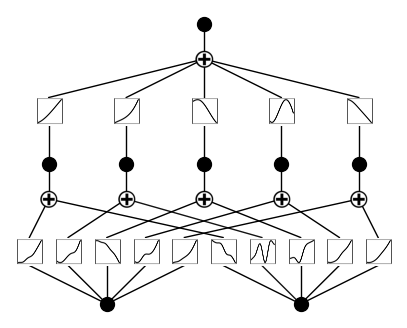

In [5]:
model(dataset['train_input'])
model.plot(beta=100)

In [6]:
history = model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

| train_loss: 8.06e-02 | test_loss: 8.27e-02 | reg: 3.21e+01 | : 100%|█| 20/20 [00:07<00:00,  2.52it

saving model version 0.1


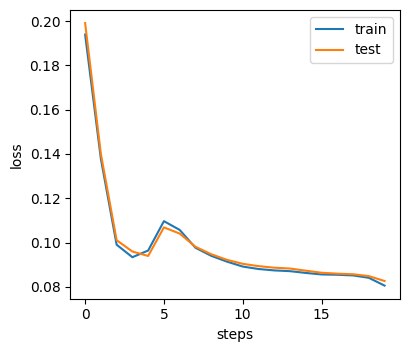

In [22]:
def plot_history(history):
    train_loss = history['train_loss']
    test_loss = history['test_loss']
    plt.subplots(figsize=(4.25, 3.75))
    plt.plot(train_loss, label = 'train')
    plt.plot(test_loss, label = 'test')
    plt.legend()
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.show()

plot_history(history)

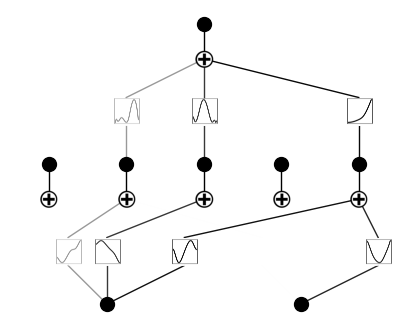

In [23]:
model.plot()

saving model version 0.2


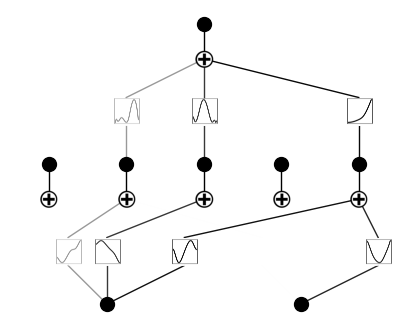

In [24]:
model.prune()
model.plot() # mask = True não funciona

saving model version 0.2


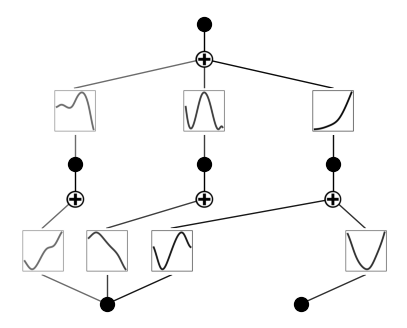

In [25]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [26]:
history = model.fit(dataset, opt="LBFGS", steps=50)

| train_loss: 3.15e-03 | test_loss: 3.27e-03 | reg: 1.17e+01 | : 100%|█| 50/50 [00:12<00:00,  4.15it

saving model version 0.3


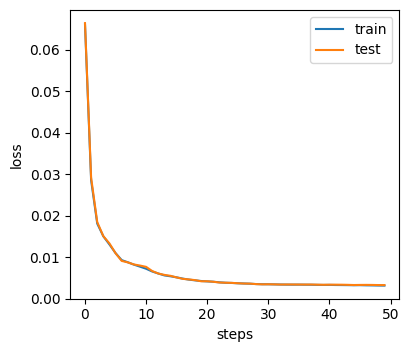

In [27]:
plot_history(history)

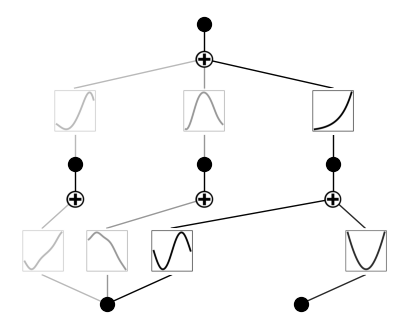

In [28]:
model.plot()

In [29]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.9096325635910034, c=1
fixing (0,0,1) with sin, r2=0.9966636896133423, c=2
fixing (0,0,2) with sin, r2=0.9999415874481201, c=2
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,1,2) with sin, r2=0.9998036026954651, c=2
fixing (1,0,0) with x, r2=0.7545148134231567, c=1
fixing (1,1,0) with sin, r2=0.9847419857978821, c=2
fixing (1,2,0) with exp, r2=0.9999979138374329, c=2
saving model version 0.4


In [30]:
history = model.fit(dataset, opt="LBFGS", steps=50)

| train_loss: 1.18e-03 | test_loss: 1.21e-03 | reg: 0.00e+00 | : 100%|█| 50/50 [00:15<00:00,  3.20it

saving model version 0.5


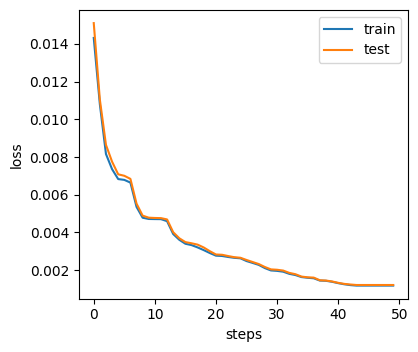

In [31]:
plot_history(history)

In [32]:
model.symbolic_formula()[0][0]

0.0232205258821036*x_1 + 993.308125104823*exp(1.0006922872426*sin(3.1418194770813*x_1 - 0.000263026042375714) + 6.97640691325631*sin(0.555037558078766*x_2 - 1.57078862190247)) + 0.0747098103165627*sin(3.40678498892373*sin(1.47897446155548*x_1 - 4.05104351043701) + 7.23308157777954) + 0.108803507117539